In [1]:
import seaborn as sns


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

# Configure matplotlib plotting
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use('fivethirtyeight')

from pylab import rcParams
rcParams['figure.figsize'] = 11, 9 #Changes default matplotlib plots to this size

In [19]:
# Load the Data
data = pd.read_csv("COMED_hourly.csv")

data.set_index('Datetime',inplace=True)

data.sort_index(inplace=True)

data.index = pd.to_datetime(data.index)

data_copy = data.copy(deep=True) # Make a deep copy, including a copy of the data and the indices
data.head(10)

,COMED_MW
Datetime,
2011-01-01 01:00:00,9631.0
2011-01-01 02:00:00,9273.0
2011-01-01 03:00:00,9011.0
2011-01-01 04:00:00,8741.0
2011-01-01 05:00:00,8694.0
2011-01-01 06:00:00,8711.0
2011-01-01 07:00:00,8943.0
2011-01-01 08:00:00,9222.0
2011-01-01 09:00:00,9430.0


In [43]:
len(data)

66497

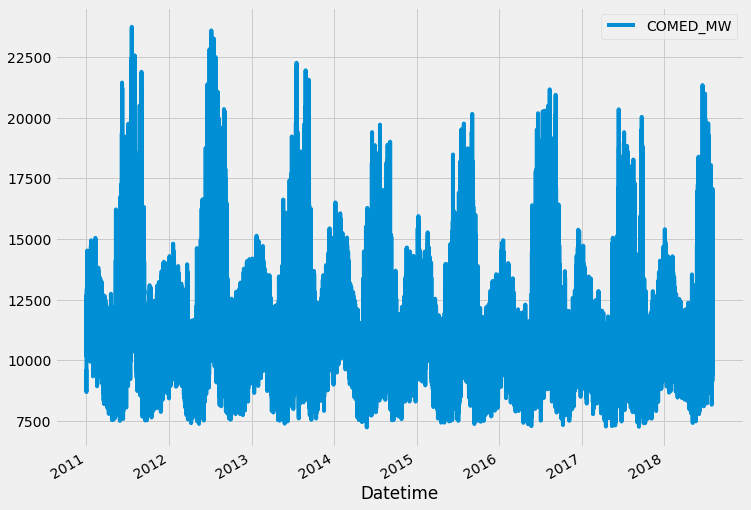

In [53]:
# Let's visualise the data
data.plot()

plt.show()

In [57]:
# Given there's no missing data, we can resample the data to daily level
daily_data = data.resample(rule='D').sum()

# Set frequency explicitly to D
daily_data = daily_data.asfreq('D')

# removing end border index as it may not have all hour data 
daily_data = daily_data.drop([daily_data.index.max()])
daily_data.tail(10)

,COMED_MW
Datetime,
2018-07-24,326779.0
2018-07-25,339676.0
2018-07-26,325997.0
2018-07-27,284822.0
2018-07-28,259413.0
2018-07-29,252378.0
2018-07-30,296519.0
2018-07-31,295933.0
2018-08-01,307690.0


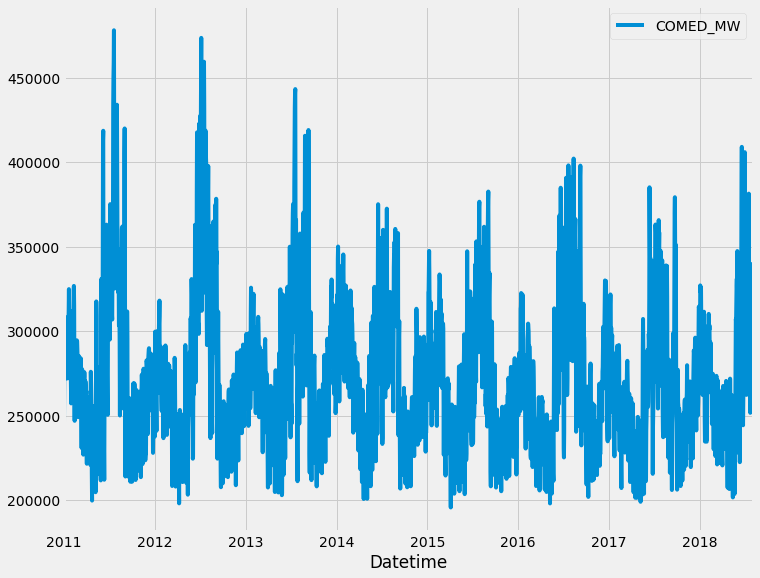

In [58]:
daily_data.plot()

plt.show()

Seasonal Decomposition

At a high-level, time series data can be thought of as components put together. That is:

Data = Level + Trend + Seasonality + Noise

Level: the average value in the series.
Trend: the increasing or decreasing value in the series.
Seasonality: the repeating short-term cycle in the series.
Noise/Residual: the random variation in the series.
Using the Python statsmodel library, the above components can be 'decomposed' (ie seasonal decomposition):

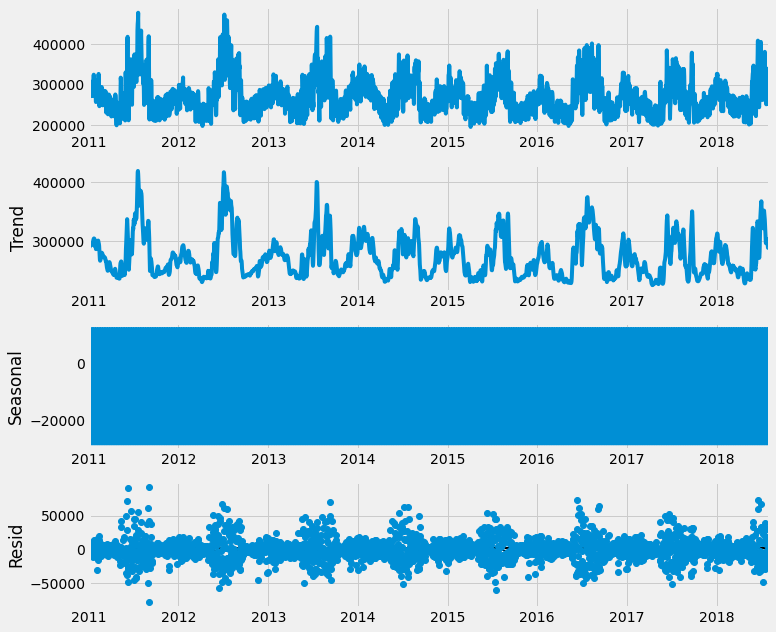

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(daily_data, model='additive')

fig = decomposition.plot()
plt.show()

From the above plot we can conclude the following 
- data closly packed so we cannot seasonality can try understand more on aggregated on day basis
- Dec-Jan comsumption is at peak in winter and drop to lowest to march
- this shows during summer comsumption is at on its peak with sudden ups and down due to rain
- we can see drop in peak demand -> this show people are switching to solar at it saves more and more sustanaible


Weekly aagregrate

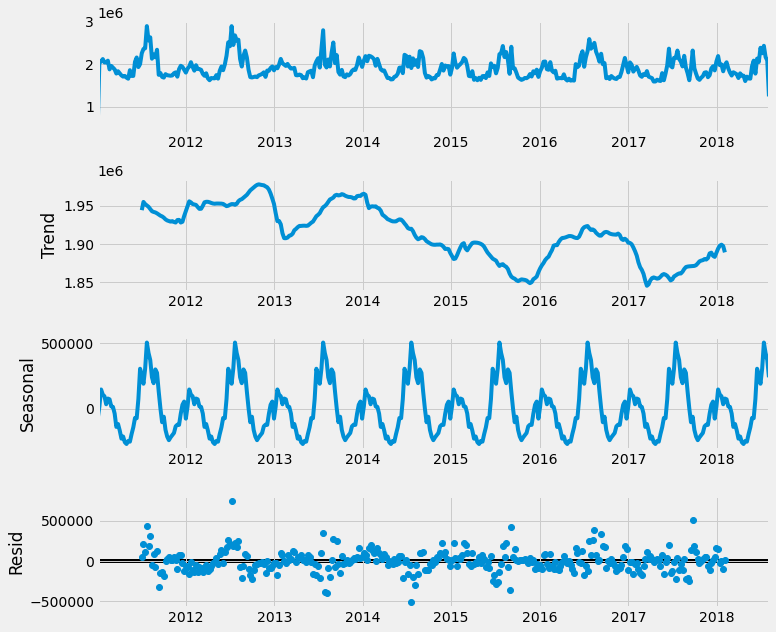

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose
weekly_data = data.resample(rule='W').sum()
decomposition = seasonal_decompose(weekly_data, model='additive') # Aggregate to weekly level

fig = decomposition.plot()
plt.show()

from the above plot we can conclude that
- during rain there is most outliers compare to normal days due to its unpredictibility
- down trend this confirms above hypothesis that adoption of solar have increased 

In [63]:
from statsmodels.tsa.stattools import adfuller as ADF

series = daily_data['COMED_MW'] # ADF takes series, not DF

result = ADF(series)

print('ADF Statistic: ', result[0])
print('P-value: {:.20f}'.format(result[1]))

ADF Statistic:  -5.836820439137729
P-value: 0.00000038591415993239


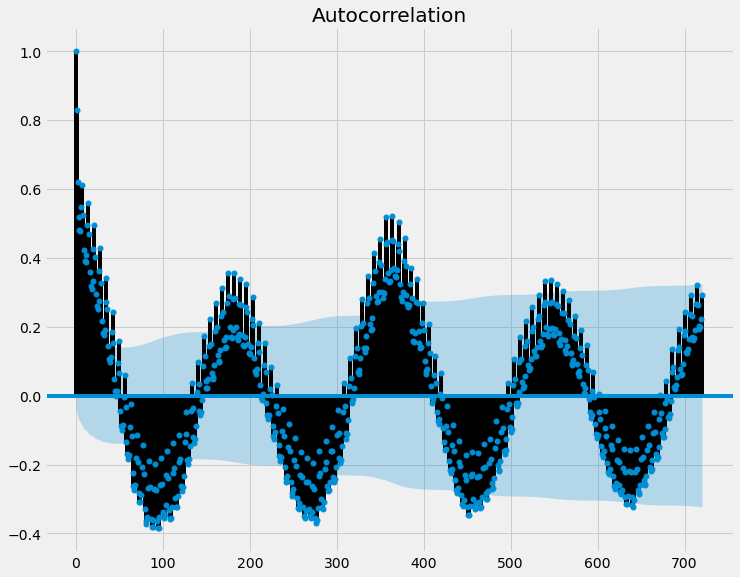

In [69]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

#fig, ax = plt.subplots(2,1)

# Plot the acf function
plot_acf(daily_data['COMED_MW'],lags=720) #alpha 1 suppresses CI

plt.show()


- we can see that good coorelation after every 180 days
- and high coorelation at same month of previos year 

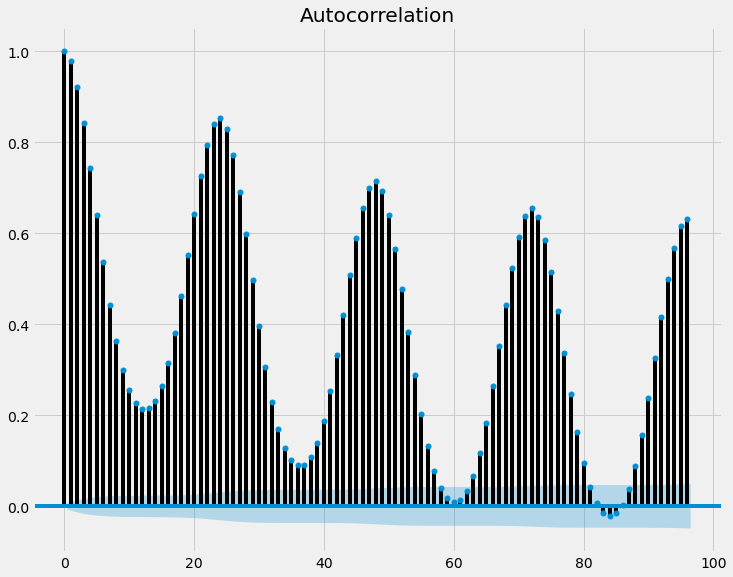

In [82]:

# Plot the acf function
plot_acf(data['COMED_MW'],lags=96) #alpha 1 suppresses CI

plt.show()

From the above plot we can conclude the following 
- high correlation  :- last 3-4 hr
                    :- same hour the day before and so on with decreasing effect 
- low correlation :- 12 hour before ( this is understood as 12pm - high load vs 12 am - low load )

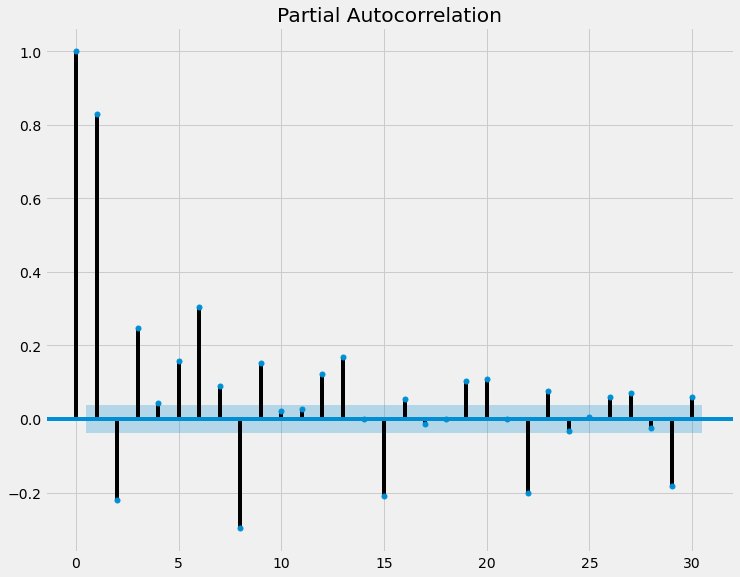

In [84]:
plot_pacf(daily_data['COMED_MW'],lags=30) #alpha 1 suppress CI

plt.show()

From the above plot we can conclude the following 
- day and day before/after have high correlation among all day in a month